In [56]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
from PIL import Image
from pathlib import Path
import warnings

plt.rcParams['axes.axisbelow'] = True

In [57]:
def v0(r,a,b):
    return np.piecewise(r, 
                        [r <= a, (r > a) & (r < b), r >= b], 
                        [lambda r: 0.,  
                        lambda r: np.exp((-4 * np.power((2 * r - a - b), 2)) / (np.power((b - a), 2) - np.power((2 * r - a - b), 2))),
                        lambda r: 0.])


def g(r,a,b):
    return np.piecewise(r, 
                        [r <= a, (r > a) & (r < b), r >= b], 
                        [lambda r: 0.,  
                        lambda r: -(2 * r - a - b) * (a - b) ** 2 / (((b - r) * (a - r)) ** 2),
                        lambda r: 0.])

def s(r,a,b):
    return np.piecewise(r, 
                        [r <= a, (r > a) & (r < b), r >= b], 
                        [lambda r: 0.,  
                        lambda r: 2 * (a - b) ** 2 * (a ** 2 + a * (b - 3 * r) + b ** 2 - 3 * b * r + 3 * r ** 2) / ((a - r) ** 3 * (b - r) ** 3),
                        lambda r: 0.])

def dv0(r,a,b):
    return np.piecewise(r, 
                        [r <= a, (r > a) & (r < b), r >= b],
                        [lambda r: 0.,
                        lambda r: g(r) * v0(r),
                        lambda r: 0.])
def d2u_factor_1d(r,a,b):
    return np.piecewise(r, 
                    [r <= a, (r > a) & (r < b), r >= b],\
                    [lambda r: 0,\
                    lambda r: np.power(a - b, 2) / (np.power(a - r, 2) * np.power(b - r, 2)) \
                        * (a**4 + 2*a**3*b - 6*a**3*r - 6*a**2*b*r + 12*a**2*r**2 + 2*a*b**3 - 6*a*b**2*r + 12*a*b*r**2 - 12*a*r**3 \
                        + b**4 - 6*b**3*r + 12*b**2*r**2 - 12*b*r**3 + 6*r**4) \
                        * np.exp((-4 * np.power((2 * r - (a + b)), 2)) / (np.power((b - a), 2) - np.power((2 * r - (a + b)), 2))),\
                    lambda r: 0])

def d2u_factor_2d(r,a,b):\
    return np.piecewise(r, \
                    [r <= a, (r > a) & (r < b), r >= b],\
                    [lambda r: 0,\
                    lambda r: np.power(a - b, 2) / (np.power(a - r, 2) * np.power(b - r, 2)) \
                        * (a**4*r + a**3*b**2 - 5*a**3*r**2 + a**2*b**3 - 6*a**2*b**2*r + 3*a**2*b*r**2 + 8*a**2*r**3 + 3*a*b**2*r**2 - 7*a*r**4 \
                        + b**4*r - 5*b**3*r**2 + 8*b**2*r**3 - 7*b*r**4 + 4*r**5) \
                        * np.exp((-4 * np.power((2 * r - (a + b)), 2)) / (np.power((b - a), 2) - np.power((2 * r - (a + b)), 2))),\
                    lambda r: 0])\

def d2u_factor_3d(r,a,b):
    return np.piecewise(r, \
                    [r <= a, (r > a) & (r < b), r >= b],\
                    [lambda r: 0,\
                    lambda r: r * np.power(a - b, 2) / (np.power(a - r, 2) * np.power(b - r, 2)) \
                        * (a**4*r + 2*a**3*b**2 - 2*a**3*b*r - 4*a**3*r**2 + 2*a**2*b**3 - 12*a**2*b**2*r + 12*a**2*b*r**2 + 4*a**2*r**3 - 2*a*b**3*r \
                        + 12*a*b**2*r**2 - 12*a*b*r**3 - 2*a*r**4 + b**4*r - 4*b**3*r**2 + 4*b**2*r**3 - 2*b*r**4 + 2*r**5) \
                        * np.exp((-4 * np.power((2 * r - (a + b)), 2)) / (np.power((b - a), 2) - np.power((2 * r - (a + b)), 2))),\
                    lambda r: 0])

def solveWave(T = 3., r_min = 0.0, r_max = 1.8, c = 1.5, a = 0.6, b = 1.2, I = 180, CFL = 0.5, d = 1):
    d = d
    I = I
    r_min = r_min
    r_max = r_max
    c = c
    a = a
    b = b
    i = np.arange(I + 2)
    h = (r_max - r_min) / I
    r_i = np.array([r_min + (iter - 0.5) * h for iter in i])
    CFL = CFL
    tau = CFL * h / c
    t_i = np.arange(0., T, tau)
    u = np.zeros((t_i.size, r_i.size))
    u[0, :] = v0(r_i,a,b)
    v0_i = v0(r_i,a,b)
    g_i = g(r_i,a,b)
    s_i = s(r_i,a,b)
    if d == 1:
        d2u_t_i = np.power(c, 2) * d2u_factor_1d(r_i,a,b)
    elif d == 2:
        d2u_t_i = np.power(c, 2) * (1 / np.power(r_i, d - 1)) * d2u_factor_2d(r_i,a,b)
    elif d == 3:
        d2u_t_i = np.power(c, 2) * (1 / np.power(r_i, d - 1)) * d2u_factor_3d(r_i,a,b)
    
    d2u_t_i = c ** 2 / r_i ** (d - 1) * ((d - 1) * r_i ** (d - 2) * v0_i * g_i + r_i ** (d - 1) * (g_i ** 2 * v0_i + v0_i * s_i))
    u[1, :] = u[0, :] + tau ** 2 * d2u_t_i * 0.5

    for n in range(1, t_i.size - 1):
        for i in range(1, I + 1):
            u[n + 1, i] = 2 * u[n, i] - u[n - 1, i] + (tau * c / h) ** 2 / r_i[i] ** (d - 1) * ((r_i[i] + 0.5 * h) ** (d - 1) * (u[n, i + 1] - u[n, i]) - (r_i[i] - 0.5 * h) ** (d - 1) * (u[n, i] - u[n, i - 1]))
        u[n + 1, 0] = u[n + 1, 1]
        u[n + 1, -1] = u[n + 1, -2]

    return u, r_i, t_i

In [58]:
d = 1
T = 1.6
u1, r1, t1 = solveWave(d = d, T = T, I = 100)
k = 0
for u, t in zip(u1, t1):
        plt.figure(figsize=(8, 6))
        plt.plot(r1, u, color = 'black')
        plt.ylim((-0.2, 1.2))
        plt.title(f'Решение волнового уравнения\nt = {t:.4f}, CFL = 0.5, I = 180, {d}D', fontsize=14)
        plt.grid(which='major', linestyle='-')
        plt.grid(which='minor', linestyle='--')
        plt.minorticks_on()
        plt.savefig(f'./img/1d/img_{k}.png', 
                transparent = False,  
                facecolor = 'white'
                )
        plt.close()
        k += 1

image_path_list = [f'./img/1d/img_{i}.png' for i in range(t1.size)]
image_list = [Image.open(file) for file in image_path_list]
image_list[0].save(
        f'waveEquation{d}D.gif',
        save_all=True,
        append_images=image_list[1:],
        duration= T / len(t1),
        loop=0)

In [60]:
d = 2
T = 1.6
u1, r1, t1 = solveWave(d = d, T = T)
k = 0
for u, t in zip(u1, t1):
        plt.figure(figsize=(8, 6))
        plt.plot(r1, u, color = 'black')
        plt.ylim((-0.5, 1.5))
        plt.title(f'Решение волнового уравнения\nt = {t:.4f}, CFL = 0.5, I = 180, {d}D', fontsize=14)
        plt.grid(which='major', linestyle='-')
        plt.grid(which='minor', linestyle='--')
        plt.minorticks_on()
        plt.savefig(f'./img/2d/img_{k}.png', 
                transparent = False,  
                facecolor = 'white'
                )
        plt.close()
        k += 1

image_path_list = [f'./img/2d/img_{i}.png' for i in range(t1.size)]
image_list = [Image.open(file) for file in image_path_list]
image_list[0].save(
        f'waveEquation{d}D.gif',
        save_all=True,
        append_images=image_list[1:],
        duration= T / len(t1),
        loop=0)

In [61]:
d = 3
T = 1.6
u1, r1, t1 = solveWave(d = d, T = T)
k = 0
for u, t in zip(u1, t1):
        plt.figure(figsize=(8, 6))
        plt.plot(r1, u, color = 'black')
        plt.ylim((-0.5, 1.5))
        plt.title(f'Решение волнового уравнения\nt = {t:.4f}, CFL = 0.5, I = 180, {d}D', fontsize=14)
        plt.grid(which='major', linestyle='-')
        plt.grid(which='minor', linestyle='--')
        plt.minorticks_on()
        plt.savefig(f'./img/3d/img_{k}.png', 
                transparent = False,  
                facecolor = 'white'
                )
        plt.close()
        k += 1

image_path_list = [f'./img/3d/img_{i}.png' for i in range(t1.size)]
image_list = [Image.open(file) for file in image_path_list]
image_list[0].save(
        f'waveEquation{d}D.gif',
        save_all=True,
        append_images=image_list[1:],
        duration= T / len(t1),
        loop=0)

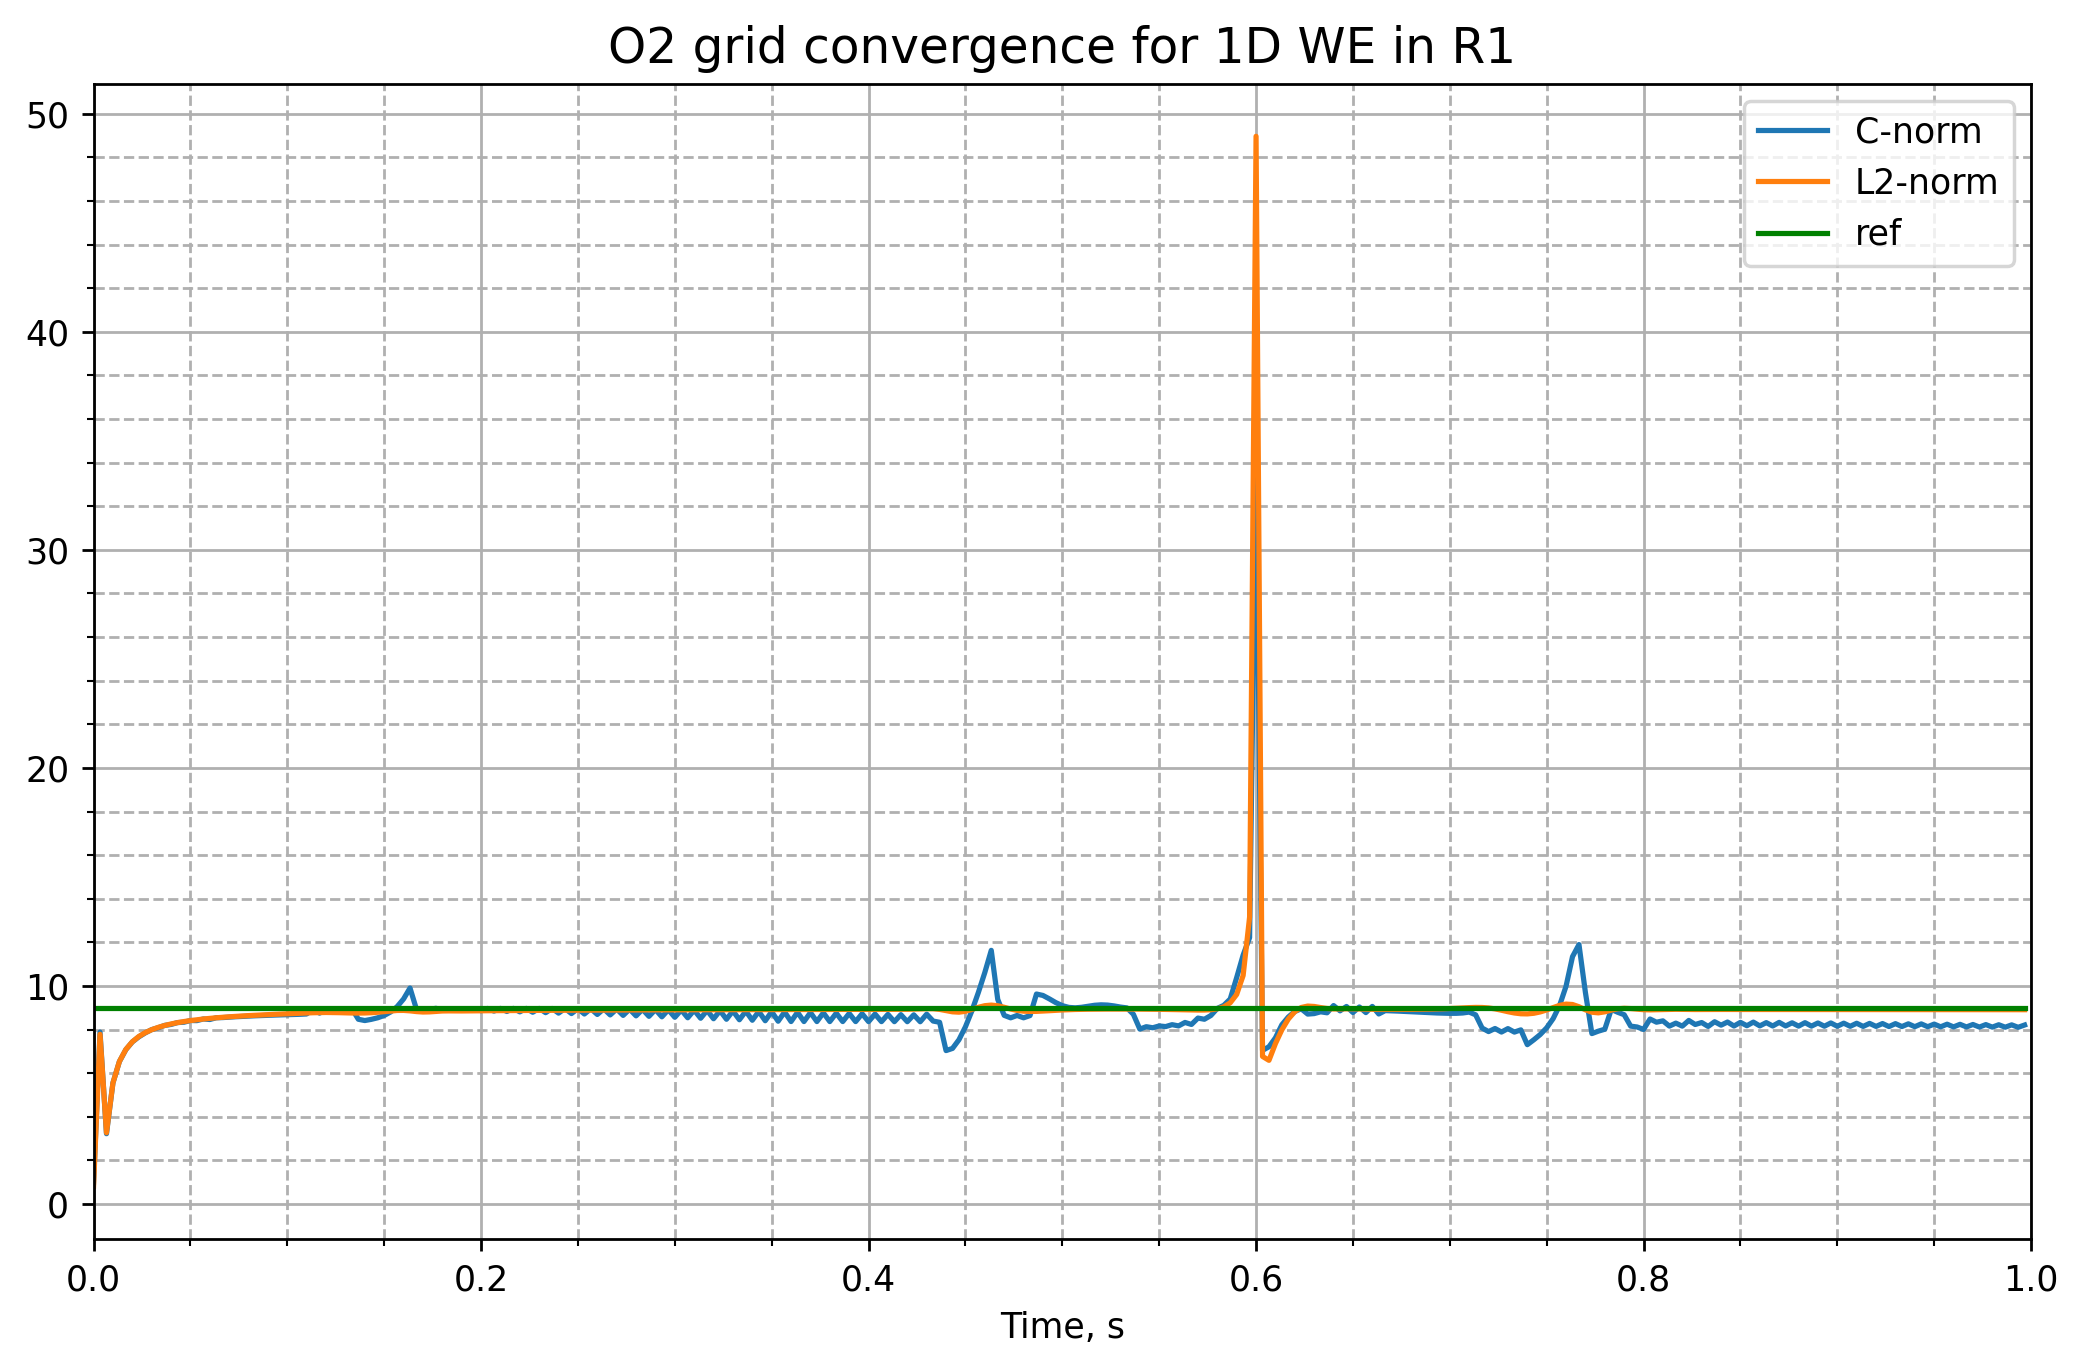

In [62]:
k = 3
base_I = 180
T = 1.
CFL = 0.5
d = 1

I1 = base_I
I2 = base_I*k
I3 = base_I*k**2
u1, r1, t1 =solveWave(c= 1.5,I = I1, CFL=CFL,T = T, d = d)
u2, r2, t2 =solveWave(c= 1.5,I = I2, CFL=CFL,T = T, d = d)
u3, r3, t3 =solveWave(c= 1.5,I = I3, CFL=CFL,T = T, d = d)

# DEBUG

# print(np.linalg.norm(t1 - t2[::k]))
# print(np.linalg.norm(t2[::k] - t3[::k**2]))

# print(r1[1:-1].size)
# print(r2[k - 1 : -(k - 1) : k].size)
# print(r3[k**2 - k - 1 : -(k**2 - k - 1) : k ** 2].size)

# print(u1[:, 1:-1].shape)
# print(u2[::k, k - 1 : -(k - 1) : k].shape)
# print(u3[::k**2, k**2 - k - 1 : -(k**2 - k - 1) : k ** 2].shape)

diffs1 = u1[:, 1:-1] - u2[::k, k - 1 : -(k - 1) : k]
diffs2 = u2[::k, k - 1 : -(k - 1) : k] - u3[::k**2, k**2 - k - 1 : -(k**2 - k - 1) : k ** 2]

ratioC = np.linalg.norm(diffs1, axis=1, ord= np.inf) / np.linalg.norm(diffs2, axis=1, ord= np.inf)
ratioL2 = np.linalg.norm(diffs1, axis=1, ord= 2) / np.linalg.norm(diffs2, axis=1, ord= 2)

x = t1
plt.figure(figsize=(10, 6), dpi= 250)
plt.plot(x, ratioC, label= 'C-norm')
plt.plot(x, ratioL2, label= 'L2-norm')
plt.plot(x, np.ones(x.size) * k**2, label= 'ref', c = 'green')
plt.legend()
plt.title(f'O2 grid convergence for 1D WE in R{d}', fontsize=14)
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle='--')
plt.xlim((0., T))
plt.minorticks_on()
plt.xlabel('Time, s')
plt.savefig(f'./O2-conv-{d}D.png', 
        transparent = False,  
        facecolor = 'white'
        )

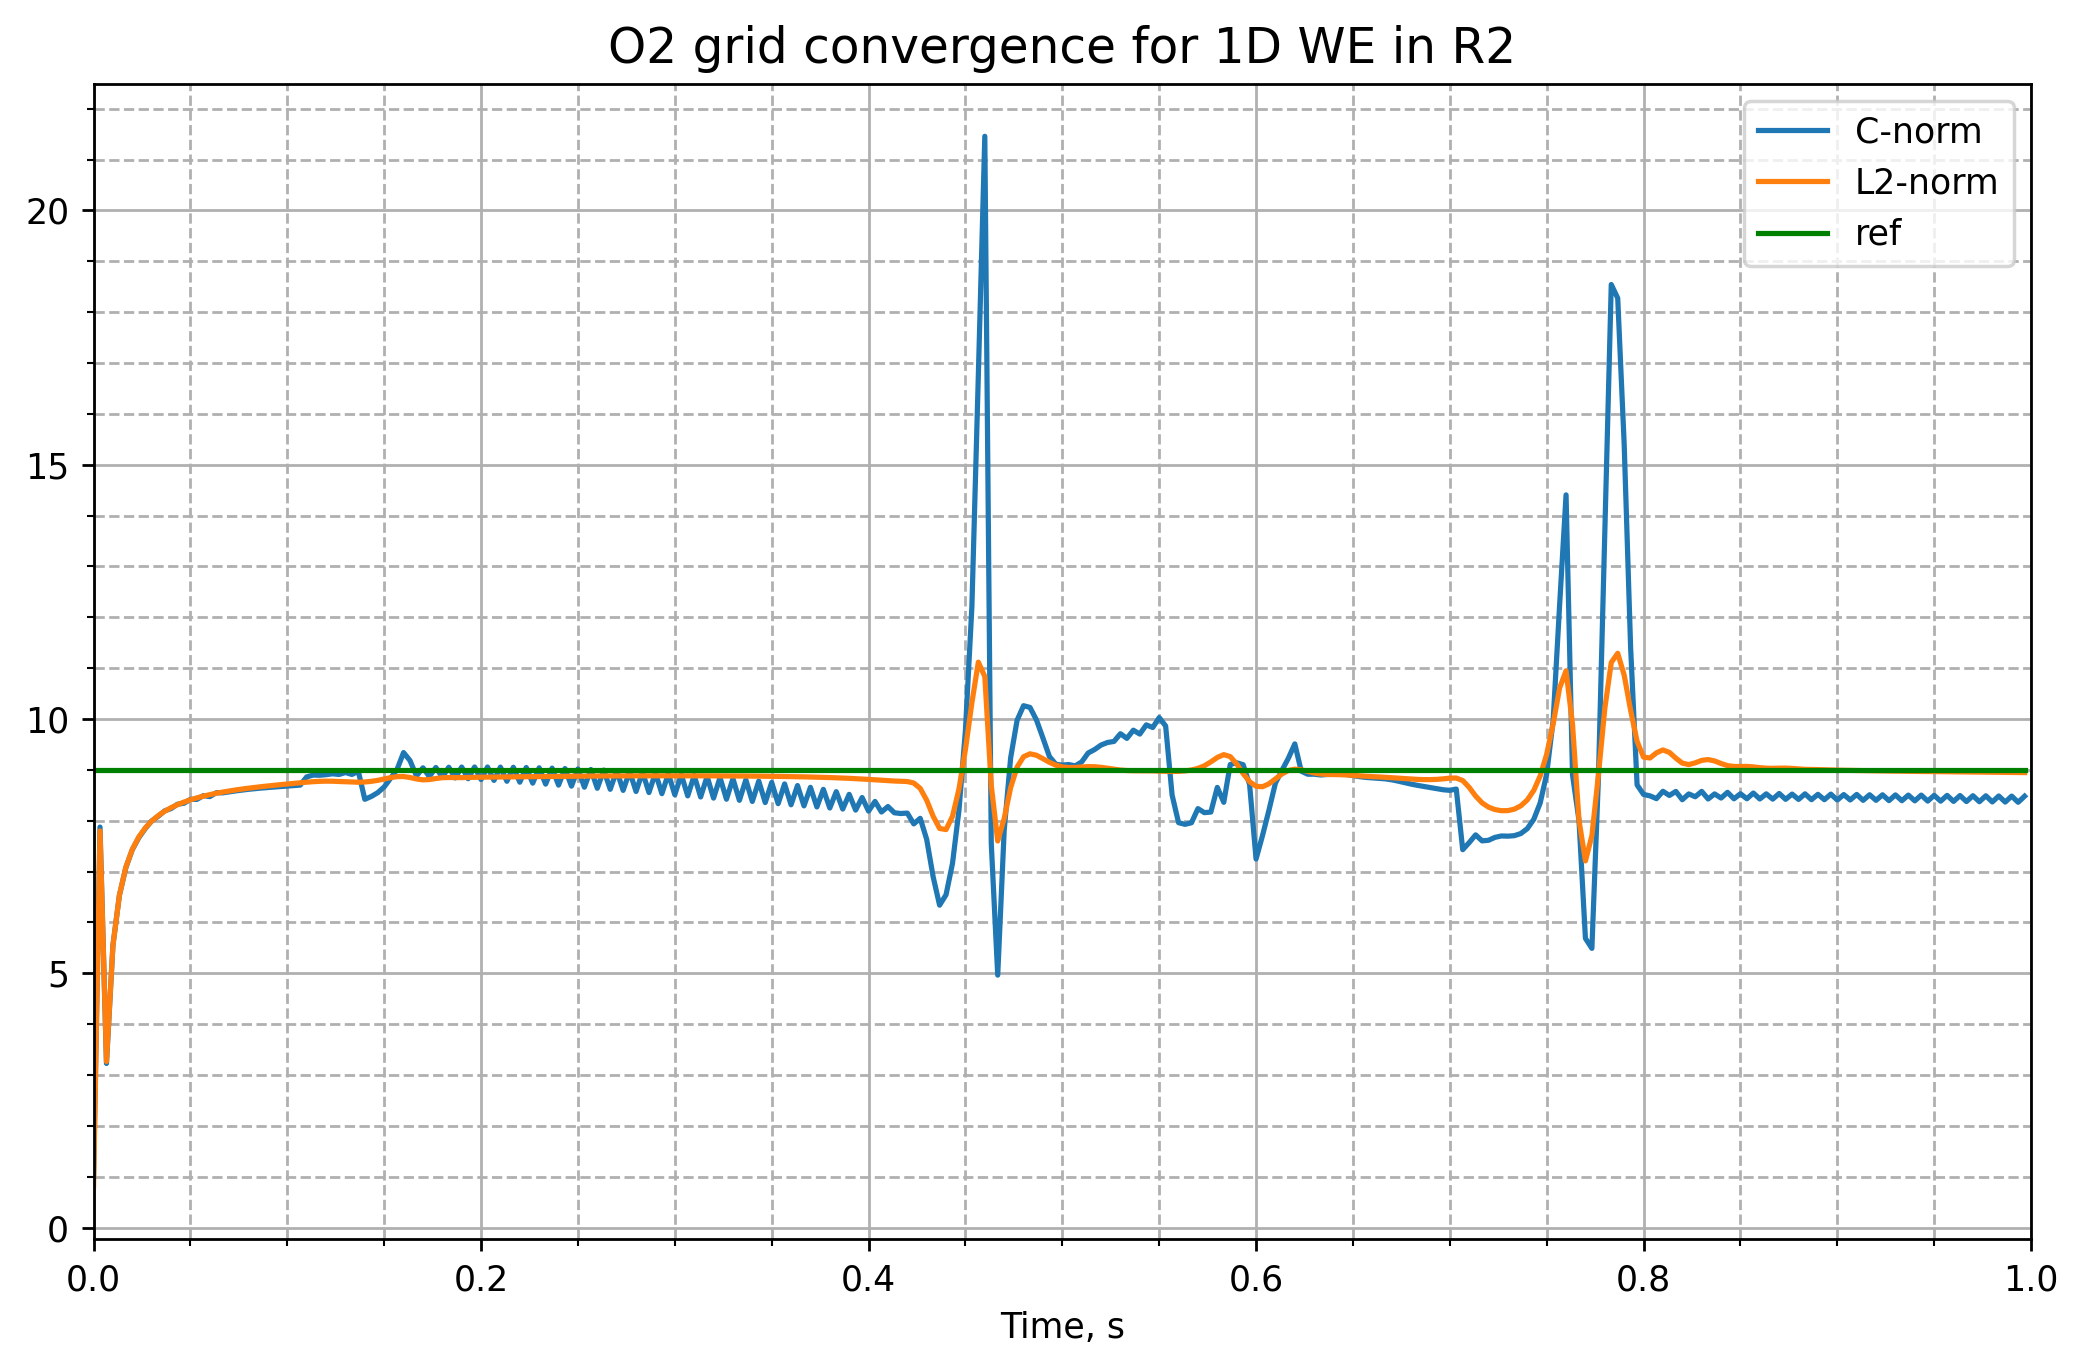

In [63]:
k = 3
base_I = 180
T = 1.
CFL = 0.5
d = 2

I1 = base_I
I2 = base_I*k
I3 = base_I*k**2
u1, r1, t1 =solveWave(c= 1.5,I = I1, CFL=CFL,T = T, d = d)
u2, r2, t2 =solveWave(c= 1.5,I = I2, CFL=CFL,T = T, d = d)
u3, r3, t3 =solveWave(c= 1.5,I = I3, CFL=CFL,T = T, d = d)

# DEBUG

# print(np.linalg.norm(t1 - t2[::k]))
# print(np.linalg.norm(t2[::k] - t3[::k**2]))

# print(r1[1:-1].size)
# print(r2[k - 1 : -(k - 1) : k].size)
# print(r3[k**2 - k - 1 : -(k**2 - k - 1) : k ** 2].size)

# print(u1[:, 1:-1].shape)
# print(u2[::k, k - 1 : -(k - 1) : k].shape)
# print(u3[::k**2, k**2 - k - 1 : -(k**2 - k - 1) : k ** 2].shape)

diffs1 = u1[:, 1:-1] - u2[::k, k - 1 : -(k - 1) : k]
diffs2 = u2[::k, k - 1 : -(k - 1) : k] - u3[::k**2, k**2 - k - 1 : -(k**2 - k - 1) : k ** 2]

ratioC = np.linalg.norm(diffs1, axis=1, ord= np.inf) / np.linalg.norm(diffs2, axis=1, ord= np.inf)
ratioL2 = np.linalg.norm(diffs1, axis=1, ord= 2) / np.linalg.norm(diffs2, axis=1, ord= 2)

x = t1
plt.figure(figsize=(10, 6), dpi= 250)
plt.plot(x, ratioC, label= 'C-norm')
plt.plot(x, ratioL2, label= 'L2-norm')
plt.plot(x, np.ones(x.size) * k**2, label= 'ref', c = 'green')
plt.legend()
plt.title(f'O2 grid convergence for 1D WE in R{d}', fontsize=14)
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle='--')
plt.xlim((0., T))
plt.minorticks_on()
plt.xlabel('Time, s')
plt.savefig(f'./O2-conv-{d}D.png', 
        transparent = False,  
        facecolor = 'white'
        )

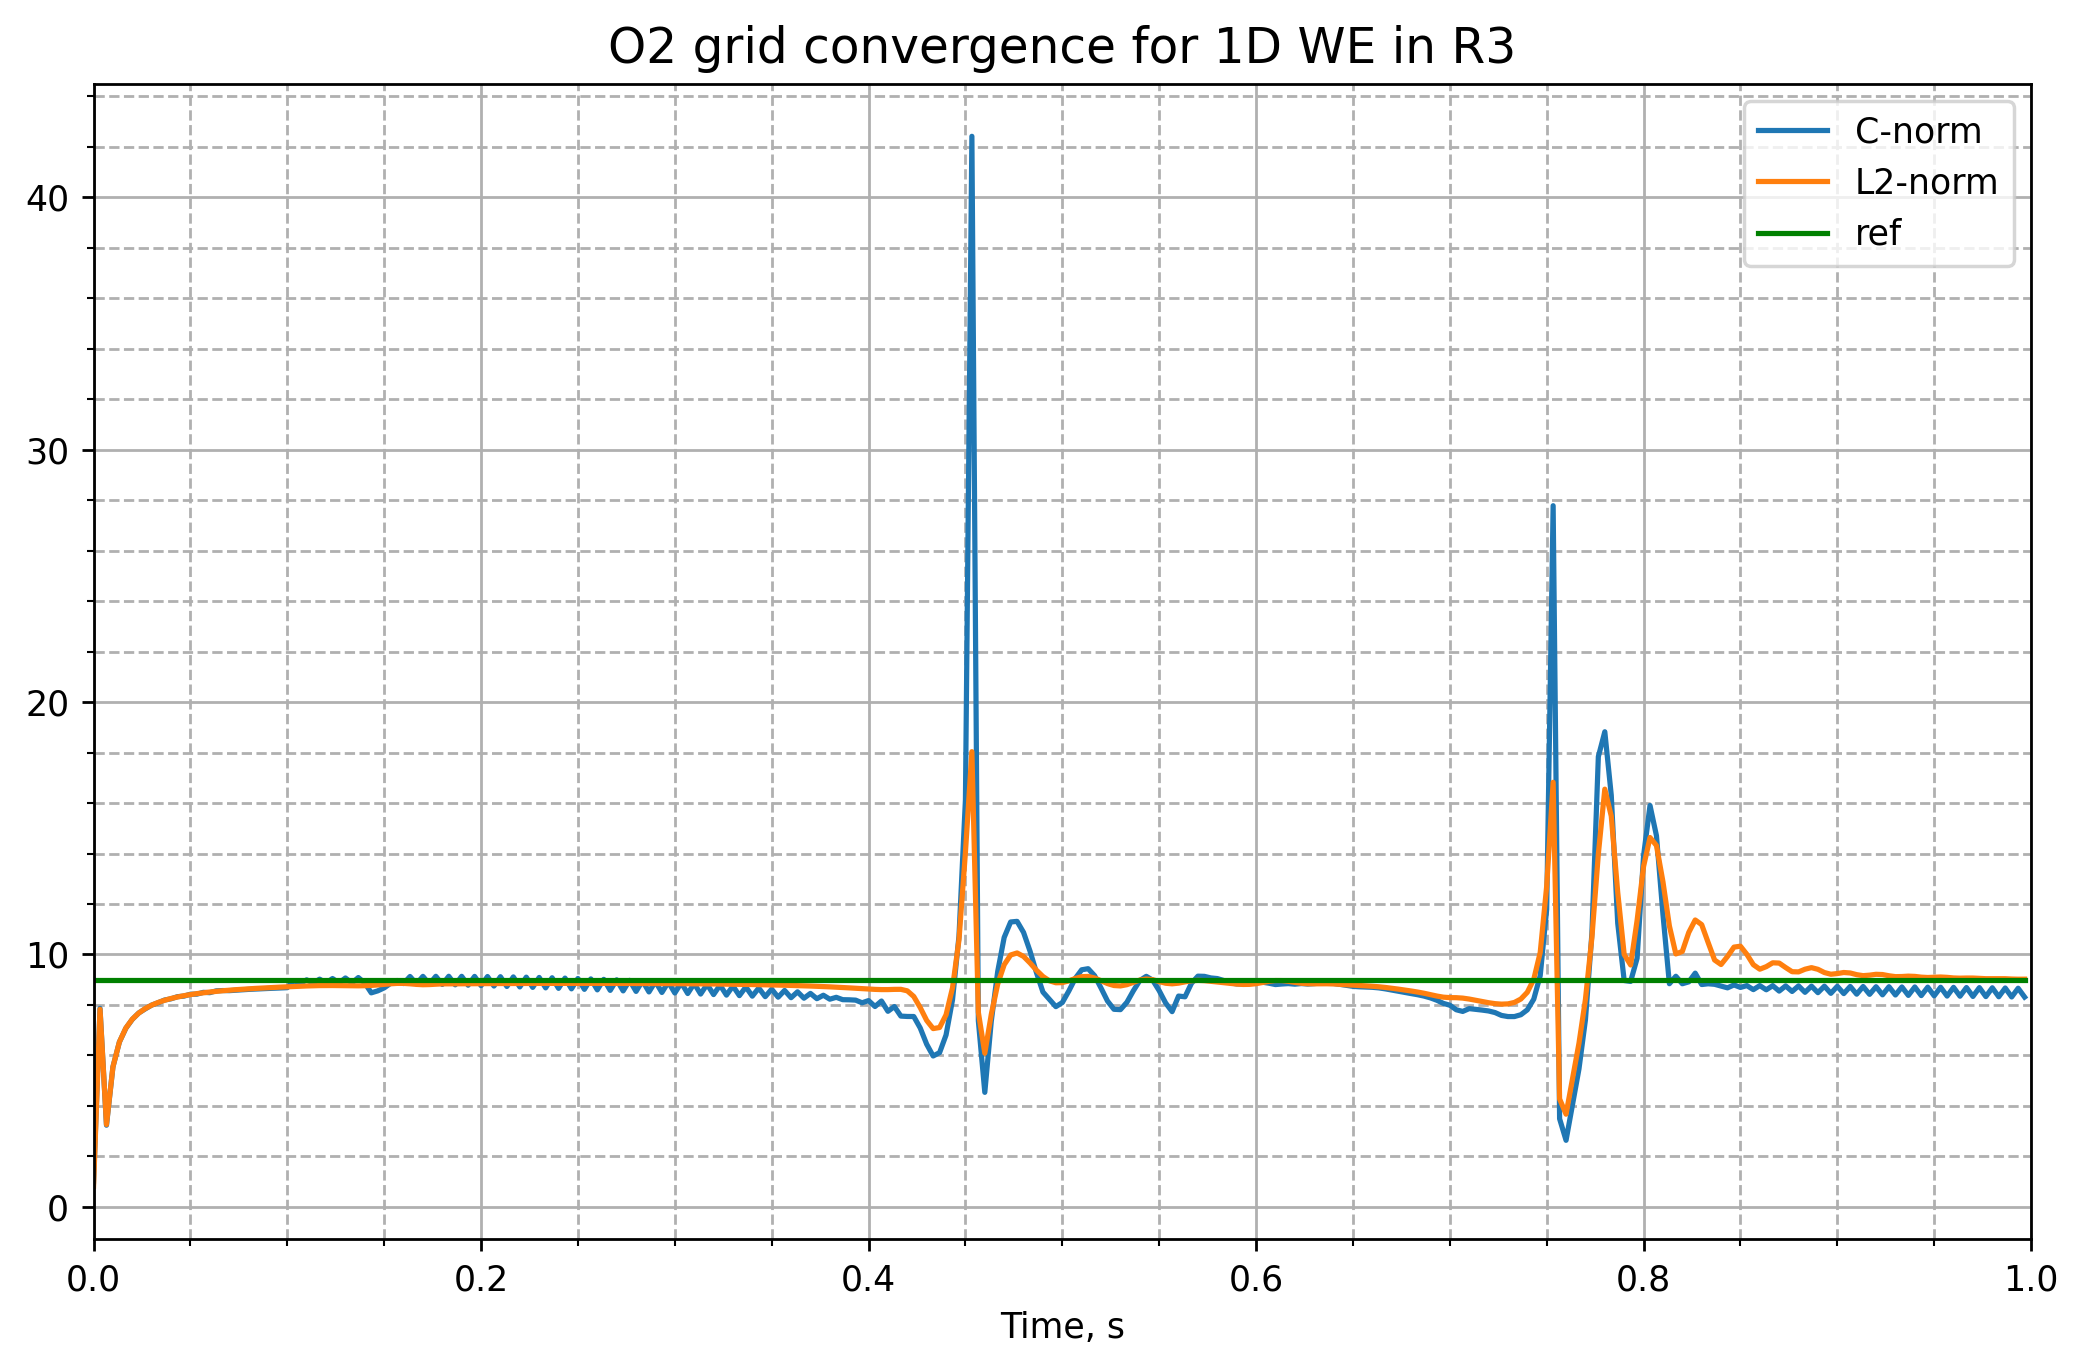

In [64]:
k = 3
base_I = 180
T = 1.
CFL = 0.5
d = 3

I1 = base_I
I2 = base_I*k
I3 = base_I*k**2
u1, r1, t1 =solveWave(c= 1.5,I = I1, CFL=CFL,T = T, d = d)
u2, r2, t2 =solveWave(c= 1.5,I = I2, CFL=CFL,T = T, d = d)
u3, r3, t3 =solveWave(c= 1.5,I = I3, CFL=CFL,T = T, d = d)

# DEBUG

# print(np.linalg.norm(t1 - t2[::k]))
# print(np.linalg.norm(t2[::k] - t3[::k**2]))

# print(r1[1:-1].size)
# print(r2[k - 1 : -(k - 1) : k].size)
# print(r3[k**2 - k - 1 : -(k**2 - k - 1) : k ** 2].size)

# print(u1[:, 1:-1].shape)
# print(u2[::k, k - 1 : -(k - 1) : k].shape)
# print(u3[::k**2, k**2 - k - 1 : -(k**2 - k - 1) : k ** 2].shape)

diffs1 = u1[:, 1:-1] - u2[::k, k - 1 : -(k - 1) : k]
diffs2 = u2[::k, k - 1 : -(k - 1) : k] - u3[::k**2, k**2 - k - 1 : -(k**2 - k - 1) : k ** 2]

ratioC = np.linalg.norm(diffs1, axis=1, ord= np.inf) / np.linalg.norm(diffs2, axis=1, ord= np.inf)
ratioL2 = np.linalg.norm(diffs1, axis=1, ord= 2) / np.linalg.norm(diffs2, axis=1, ord= 2)

x = t1
plt.figure(figsize=(10, 6), dpi= 250)
plt.plot(x, ratioC, label= 'C-norm')
plt.plot(x, ratioL2, label= 'L2-norm')
plt.plot(x, np.ones(x.size) * k**2, label= 'ref', c = 'green')
plt.legend()
plt.title(f'O2 grid convergence for 1D WE in R{d}', fontsize=14)
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle='--')
plt.xlim((0., T))
plt.minorticks_on()
plt.xlabel('Time, s')
plt.savefig(f'./O2-conv-{d}D.png', 
        transparent = False,  
        facecolor = 'white'
        )